In [2]:
!pip install torch-scatter
!pip install torch-sparse
!pip install torch-cluster
!pip install torch-spline-conv
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.6/107.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.1-cp310-cp310-linux_x86_64.whl size=489401 sha256=c1a993f68010b4b47e628da05e4615cd8b78e862883cbaa1acf54acf4cd7aa33
  Stored in directory: /root/.cache/pip/wheels/ef/67/58/6566a3b61c6ec0f2ca0c2c324cd035ef2955601f0fb3197d5f
Successfully built torch-scatter
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.17-cp310-cp310-linux_x86_64.whl size=1078307 sha256=9aa4213a3f82b11a9bc44e540bc1b84a447f04f37eb8825ede5e0f35e6d2f5da
  Stored in directory: /root/.cache/pip/wheels/67/25/e7/037b58fa

In [3]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch_geometric.nn as pyg_nn
from torch_geometric.datasets import Planetoid
     

In [11]:
# 1.加载Cora数据集，可用Citeseer、Pubmed替换

#dataset = Planetoid(root='./data/Cora', name='Cora')
dataset = Planetoid(root='./data/Citeseer', name='Citeseer')
     

Processing...
Done!


In [12]:
# 2.定义GraphSAGE网络
class GraphSAGE(nn.Module):
    def __init__(self, num_node_features, num_classes):
        super(GraphSAGE, self).__init__()
        self.conv1 = pyg_nn.SAGEConv(num_node_features, 16)
        self.conv2 = pyg_nn.SAGEConv(16, num_classes)
        
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        
        return F.log_softmax(x, dim=1)


In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # 设备
epochs = 600 # 学习轮数
lr = 0.0003 # 学习率
num_node_features = dataset.num_node_features # 每个节点的特征数
num_classes = dataset.num_classes # 每个节点的类别数
data = dataset[0].to(device) # Citeseer的一张图

# 3.定义模型
model = GraphSAGE(num_node_features, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr) # 优化器
loss_function = nn.NLLLoss() # 损失函数
     


In [15]:
# 训练模式
model.train()

for epoch in range(epochs):
    optimizer.zero_grad()
    pred = model(data)
    
    loss = loss_function(pred[data.train_mask], data.y[data.train_mask]) # 损失
    correct_count_train = pred.argmax(axis=1)[data.train_mask].eq(data.y[data.train_mask]).sum().item() # epoch正确分类数目
    acc_train = correct_count_train / data.train_mask.sum().item() # epoch训练精度
    
    loss.backward()
    optimizer.step()
    
    if epoch % 20 == 0:
        print("【EPOCH: 】%s" % str(epoch + 1))
        print('训练损失为：{:.4f}'.format(loss.item()), '训练精度为：{:.4f}'.format(acc_train))

print('【Finished Training！】')

     

【EPOCH: 】1
训练损失为：1.7976 训练精度为：0.1833
【EPOCH: 】21
训练损失为：1.5657 训练精度为：0.7000
【EPOCH: 】41
训练损失为：1.2509 训练精度为：0.8750
【EPOCH: 】61
训练损失为：1.0080 训练精度为：0.9333
【EPOCH: 】81
训练损失为：0.7722 训练精度为：0.9750
【EPOCH: 】101
训练损失为：0.6139 训练精度为：0.9750
【EPOCH: 】121
训练损失为：0.4783 训练精度为：0.9917
【EPOCH: 】141
训练损失为：0.3982 训练精度为：0.9917
【EPOCH: 】161
训练损失为：0.3217 训练精度为：0.9833
【EPOCH: 】181
训练损失为：0.2861 训练精度为：0.9917
【EPOCH: 】201
训练损失为：0.2479 训练精度为：0.9917
【EPOCH: 】221
训练损失为：0.2260 训练精度为：0.9917
【EPOCH: 】241
训练损失为：0.1892 训练精度为：0.9833
【EPOCH: 】261
训练损失为：0.1556 训练精度为：1.0000
【EPOCH: 】281
训练损失为：0.1477 训练精度为：1.0000
【EPOCH: 】301
训练损失为：0.1581 训练精度为：0.9750
【EPOCH: 】321
训练损失为：0.1317 训练精度为：0.9917
【EPOCH: 】341
训练损失为：0.1122 训练精度为：1.0000
【EPOCH: 】361
训练损失为：0.1185 训练精度为：0.9833
【EPOCH: 】381
训练损失为：0.0970 训练精度为：1.0000
【EPOCH: 】401
训练损失为：0.0690 训练精度为：1.0000
【EPOCH: 】421
训练损失为：0.0920 训练精度为：1.0000
【EPOCH: 】441
训练损失为：0.0725 训练精度为：0.9917
【EPOCH: 】461
训练损失为：0.0587 训练精度为：1.0000
【EPOCH: 】481
训练损失为：0.0590 训练精度为：1.0000
【EPOCH: 】501
训练损失为：0.0636 训练精度为

In [16]:
from sklearn.metrics import f1_score
# 模型验证
model.eval()
pred = model(data)

# 训练集（使用了掩码）
correct_count_train = pred.argmax(axis=1)[data.train_mask].eq(data.y[data.train_mask]).sum().item()
acc_train = correct_count_train / data.train_mask.sum().item()
loss_train = loss_function(pred[data.train_mask], data.y[data.train_mask]).item()
pred_train = pred.argmax(axis=1)[data.train_mask]
y_train = data.y[data.train_mask]
f1_train = f1_score(pred_train.cpu(), y_train.cpu(), average='weighted')


# 测试集
correct_count_test = pred.argmax(axis=1)[data.test_mask].eq(data.y[data.test_mask]).sum().item()
acc_test = correct_count_test / data.test_mask.sum().item()
loss_test = loss_function(pred[data.test_mask], data.y[data.test_mask]).item()
pred_test = pred.argmax(axis=1)[data.test_mask]
y_test = data.y[data.test_mask]
f1_test = f1_score(pred_test.cpu(), y_test.cpu(), average='weighted')



print('Train Accuracy: {:.4f}'.format(acc_train), 'Train Loss: {:.4f}'.format(loss_train), 'Train f1_score: {:.4f}'.format(f1_train))
print('Test  Accuracy: {:.4f}'.format(acc_test), 'Test  Loss: {:.4f}'.format(loss_test), 'Train f1_score: {:.4f}'.format(f1_test))



Train Accuracy: 1.0000 Train Loss: 0.0072 Train f1_score: 1.0000
Test  Accuracy: 0.5660 Test  Loss: 1.2228 Train f1_score: 0.5456


<ipython-input-18-cd036b24ff47>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


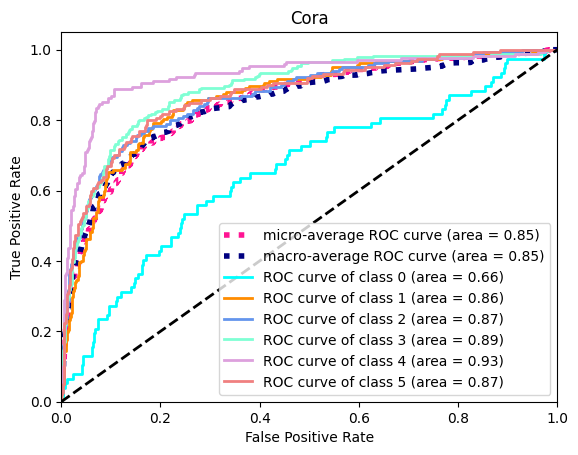

In [18]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
from scipy import interp
import numpy as np
import matplotlib.pyplot as plt


y_test2 = label_binarize(y_test.cpu(), classes=[0, 1, 2, 3, 4, 5])
pred_test2 = pred[data.test_mask]
n_classes = y_test2.shape[1]

# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], pred_test2[:, i].detach().numpy())
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test2.ravel(), pred_test2.detach().numpy().ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'aquamarine', 'plum', 'lightcoral', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cora')
plt.legend(loc="lower right")
plt.show()
